In [1]:
# DS 1: Data Analysis, Visualization & Databases
# Project 1 Guidelines: Summer Academy NPS Data


In [6]:
# Run this cell to import the packages you'll need and set a seed
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO

# Please dont change this--otherwise, you'll get different results from everyone else!
np.random.seed(1500)

In [7]:
path = "datasets/2017/Student Feedback Surveys-Superview.csv"
df = pd.read_csv(path)
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


In [8]:
## reduce week into integer to sort satisfaction by week

df['Week'] = df['Week'].str.extract('(\d+)').astype(int)
df

/Users/yveslym/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1,3,Just right
1,36,Los Angeles,Apps,1,4,A little too fast
2,117,San Francisco,Games,1,4,Way too slow
3,253,NaN,NaN,2,4,A little too fast
4,350,New York City,"Apps, Explorer",1,4,Just right
5,23,Redwood City,Apps,1,5,Just right
6,28,Los Angeles,Apps,7,5,Just right
7,65,San Francisco,Apps,1,5,A little too slow
8,101,Santa Clara,Apps,1,5,A little too slow
9,124,Santa Clara,Apps,1,5,Just right


In [9]:
# create schedule dictionary
schedule = {"Way too slow":1, "A little too slow":2, "Just right": 3, "A little too fast": 4, "Way too fast":5}


In [10]:
## clean data: remove every row of  that doesn't have value == to int

# df['Rating (Num)'] = df[df['Rating (Num)'].apply(lambda x: x.isnumeric())]

In [11]:

df2 = df[(df['Rating (Num)'] != '#ERROR!')]

In [13]:
## Try to solve: what is the average satisfaction by week



In [14]:
#convert Rating number into integer

x = df2['Rating (Num)'].apply(int)
df2['Rating (Num)'] = x
df2

/Users/yveslym/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1,3,Just right
1,36,Los Angeles,Apps,1,4,A little too fast
2,117,San Francisco,Games,1,4,Way too slow
3,253,NaN,NaN,2,4,A little too fast
4,350,New York City,"Apps, Explorer",1,4,Just right
5,23,Redwood City,Apps,1,5,Just right
6,28,Los Angeles,Apps,7,5,Just right
7,65,San Francisco,Apps,1,5,A little too slow
8,101,Santa Clara,Apps,1,5,A little too slow
9,124,Santa Clara,Apps,1,5,Just right


In [15]:
# average satisfaction on week 1
df2[(df2['Week'] == 8)].describe()

,ID,Week,Rating (Num)
count,9.000000,9.0,9.000000
mean,1443.888889,8.0,9.111111
std,18.141420,0.0,1.054093
min,1401.000000,8.0,7.000000
25%,1443.000000,8.0,9.000000
50%,1445.000000,8.0,9.000000
75%,1447.000000,8.0,10.000000
max,1465.000000,8.0,10.000000


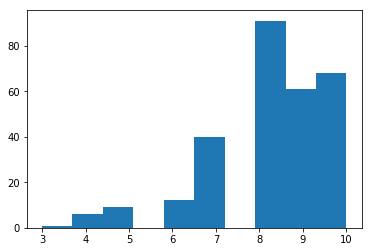

In [16]:
#take the a data set of sweek 1 and plug on histogram
week1 = df2[(df2['Week'] == 1)]
data = week1['Rating (Num)']
plt.hist(data)

# funtion to return a dataset of student satisfaction by week
def weekly_satisfaction(week):
    if week < 1 and week > 8 and type(week) == str:
        return
    else:
        week1 = df2[(df2['Week'] == week)]
        data = week1['Rating (Num)']
        return data

In [17]:

# Complete the two functions below.  
def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    
    sample_set = np.random.choice(dataset,n)
    sample_mean = np.sum(sample_set)/n
    return sample_mean
    

def create_sample_distribution(dataset, size=100):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    mean_set = np.empty((0,size))
    for _ in range(0, size):
        
        n = random.randint(30,100)
        sample_mean = get_sample(dataset, n)
        mean_set = np.append(mean_set, sample_mean)
    return mean_set 


(array([  2.,   3.,   6.,   0.,   8.,  25.,   0.,  49.,  55.,  45.]),
 array([  3. ,   3.7,   4.4,   5.1,   5.8,   6.5,   7.2,   7.9,   8.6,
          9.3,  10. ]),
 <a list of 10 Patch objects>)

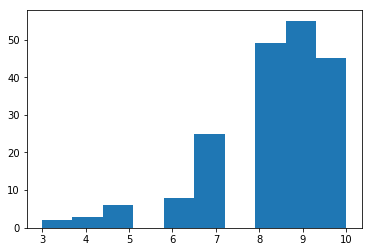

In [18]:
#create a data distribution
distribution = create_sample_distribution( weekly_satisfaction(4),50000)
plt.hist(weekly_satisfaction(4))


In [19]:
#visualization
#the read line represent the mean
# plt.hist(distribution)
# plt.axvline(distribution.mean(), color='r', linestyle='dashed', linewidth=2)
# #visualization function
def histo(week, size = 50000):
    distribution = create_sample_distribution( weekly_satisfaction(week),size)
    plt.hist(distribution)
    plt.axvline(distribution.mean(), color='r', linestyle='dashed', linewidth=2)

    

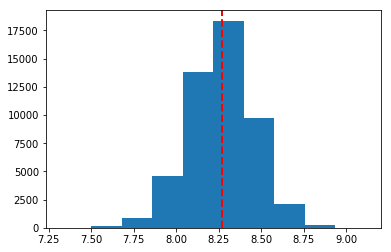

In [20]:
##week 1
histo(1)

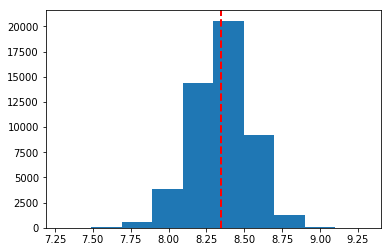

In [21]:
##week 2
histo(2)

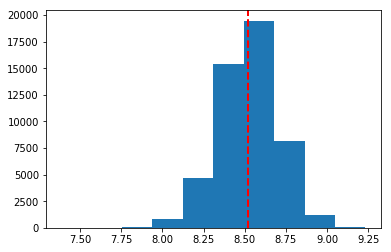

In [22]:
#week 3
histo(3)

In [63]:
## get segment the df into 3 category
#promoter: all student with rating above 9
#passive: all student with rating betwwen 7 - 8
#detractor (AKA haters): all student with rating 1 - 6

promoter = df2[(df2["Rating (Num)"] > 8)]
passive = df2[(df2["Rating (Num)"] >= 7) & ((df2["Rating (Num)"] < 9))]
detractor = df2[(df2["Rating (Num)"] <= 6)]

In [71]:
promoter_count = promoter.sum()
passive_count = passive.sum()
detractor_count = detractor.sum()
promoter_count




ID                                                            604958
Week                                                            2757
Rating (Num)                                                    7216
Schedule Pacing    Just rightJust rightJust rightJust rightA litt...
dtype: object

In [67]:
pr_sum = promoter_count["Rating (Num)"]
ps_sum = passive_count["Rating (Num)"]
de_sum = detractor_count["Rating (Num)"]

pr_sum

7216

In [69]:
#NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)

NPS = (pr_sum - de_sum)/(pr_sum + ps_sum + de_sum)
NPS

0.5413047041468612

In [ ]:
# #change rating number into category
# d = np.array([])

# rating = df2["Rating (Num)"]

# for rate in rating:
#     if rate < 7:
#         d = np.append(d,"detractor")
        
#     elif rate > 7 and rate <= 8:
#         d = np.append(d,"passif")
#     elif rate > 8 and rate <= 10:
#         d = np.append(d,"promoter")
#     else:
#         d = np.append(d,"NaN")
#df_2017 = df2
#df_2017["Rating (Num)"] = d